# 1. Importing Library

In [2]:
#importing libraries
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
import pickle

In [3]:
#importing data
iris_data=pd.read_csv("iris.csv")

In [4]:
print(iris_data.head(15))

    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
#Flower distribution    
print(iris_data.shape)

(150, 5)


<AxesSubplot:xlabel='class', ylabel='petal_width'>

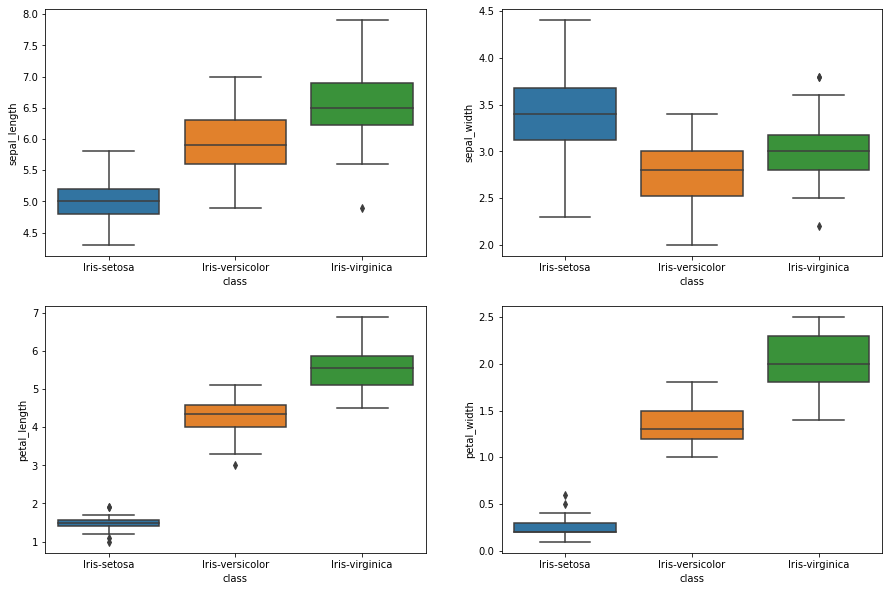

In [7]:
#Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='class',y='sepal_length',data=iris_data)    
plt.subplot(2,2,2)    
sns.boxplot(x='class',y='sepal_width',data=iris_data)    
plt.subplot(2,2,3)    
sns.boxplot(x='class',y='petal_length',data=iris_data)    
plt.subplot(2,2,4)    
sns.boxplot(x='class',y='petal_width',data=iris_data)

/home/mmk6053/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


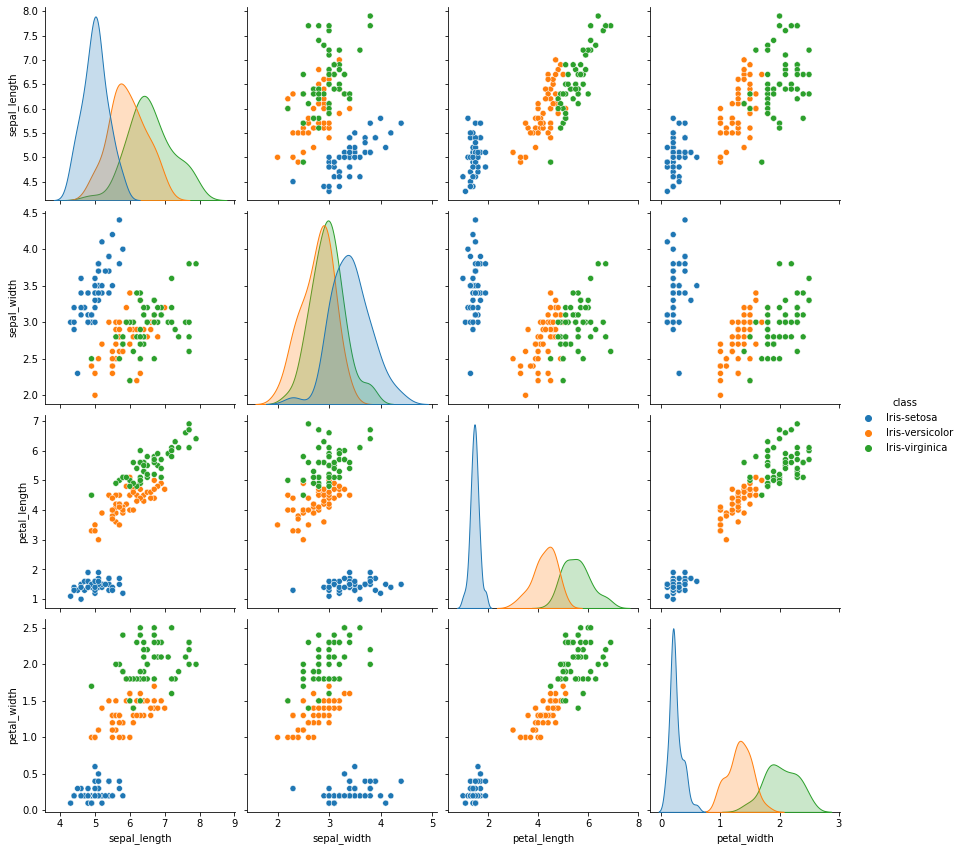

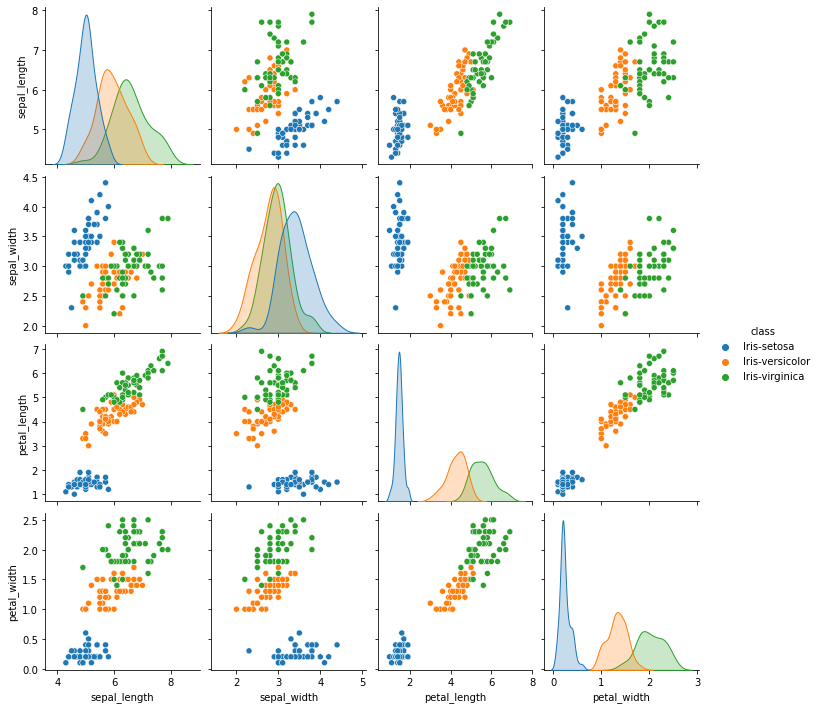

In [8]:
#Pairwise joint plot (scatter matrix)    
#sns.pairplot(iris_data)    
#sns.pairplot(iris_data) 
sns.pairplot(iris_data, hue='class', size=3, diag_kind="kde")    
sns.pairplot(iris_data,hue='class') 

# 2.Data preprocessing

In [10]:
X=iris_data.iloc[:,0:-1]
y=iris_data.iloc[:,-1]

In [11]:
X.shape

(150, 4)

In [12]:
y.shape

(150,)

# 3.Encode labels

In [13]:
#let's encode target labels (y), (here we have class column) with values between 0 and n_classes-1.
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [14]:
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
classes

array([0, 1, 2])

# 4. Train and validate data (Machine learning)

## 4.1 Data Splitting

In [16]:
#split data into training and test sets
#training which can be used to make future predictions and testing data is used to evaluate the model after the training phase.
#here is we are giving 80:20 ratio (80% for prediction and 20 % for testing)
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [17]:
iris_data.iloc[:,0:10].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4.2 Data Normalization

In [18]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

# 4.3 Train the model

In [19]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

# Step 4.4 – Model Evaluation:

In [20]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [22]:
#A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# #Step 5 – Testing the model:

In [ ]:
#Testing the model with real data

In [23]:
X_new = np.array([[4, 2, 1, 0.2], [  5.9, 2.2, 3.8, 1.1 ], [  6.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 1]


In [24]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array([0, 1, 1])